In [27]:
#Load the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Load the Dataset
data=pd.read_table('/content/fruit_data_with_colors.txt')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
print(data.shape)

(59, 7)


In [6]:
print(data['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [7]:
print(data.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


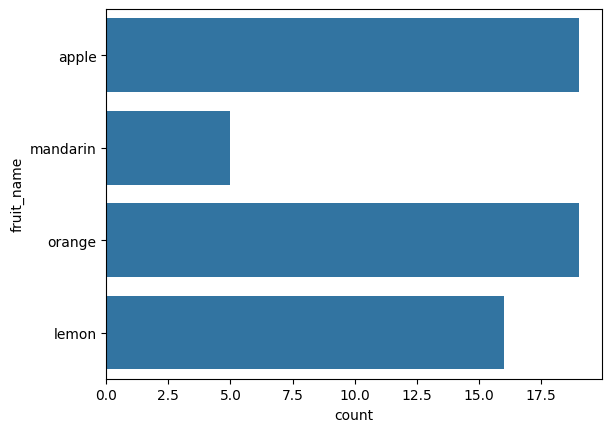

In [14]:
#Fruit Distribution
sns.countplot(data['fruit_name'],label="Count" )
plt.show()

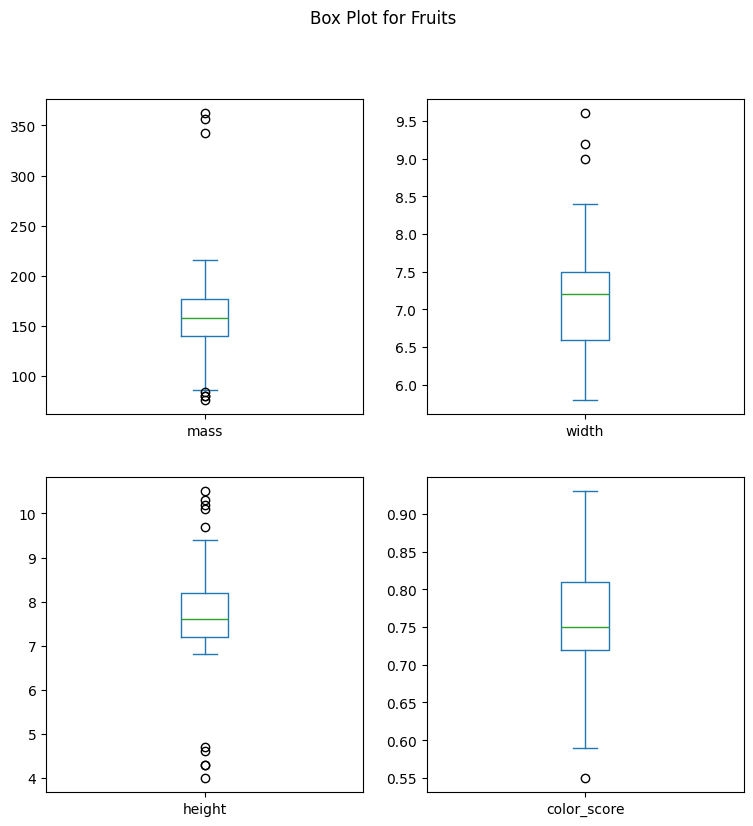

In [17]:
#Fruit Distribution through BoxPlot
data.drop('fruit_label',axis=1).plot(kind='box' , subplots=True , layout=(2,2),sharex=False ,sharey=False , figsize=(9,9) , title='Box Plot for Fruits')
plt.savefig('Fruits_Name')
plt.show()

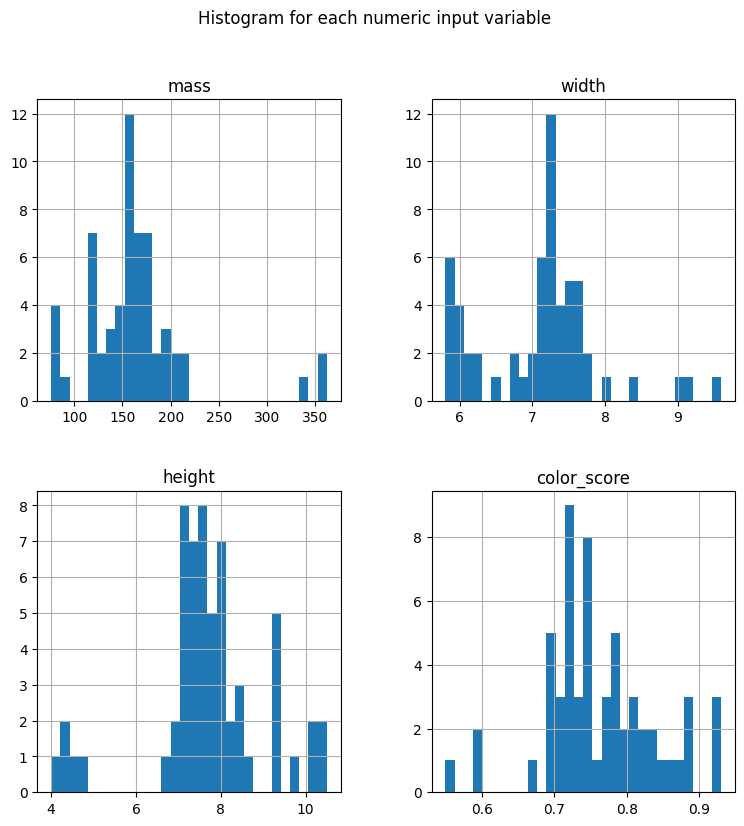

In [19]:
import pylab as pl
data.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

In [26]:
#Statistical Info.
data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [28]:
#Create Training and Testing Sets
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [29]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [46]:
##Model Building
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
train_score=logreg.score(X_train,y_train)
print('Accuracy of Logistic Regression Classifier on training set is:',round(train_score,2))

test_score=logreg.score(X_test,y_test)
print('Accuracy of Logistic Regression Classifier on testing set is:',round(test_score,2))


Accuracy of Logistic Regression Classifier on training set is: 0.68
Accuracy of Logistic Regression Classifier on testing set is: 0.42


In [47]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

#model testing and accuracy score
test_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(test_pred,y_test)
print('Accuracy Score of Decision Tree Classifier on testing set is', round(test_acc,2))

train_pred=clf.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
print('Accuracy Score of Decision tree Classifier on training set is', round(train_acc,2))


Accuracy Score of Decision Tree Classifier on testing set is 0.42
Accuracy Score of Decision tree Classifier on training set is 1.0


In [48]:
#K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
train_score=knn.score(X_train,y_train)
print('Accuracy of K-NN classifier on training set is:',round(train_score,2))
test_score=knn.score(X_test,y_test)
print('Accuracy of K-NN classifier on test set is:',round(test_score,2))

Accuracy of K-NN classifier on training set is: 0.96
Accuracy of K-NN classifier on test set is: 0.83


In [ ]:
#Model Selection
#We will choose the K-NN classifier as it achieves the best balance between training and testing accuracy (96% on training and 83% on testing).
#It generalizes well to unseen data, unlike the Decision Tree, which overfits (100% on training but only 42% on testing).
#The Logistic Regression model performs poorly (42% testing accuracy), indicating it may not capture the data's complexity effectively


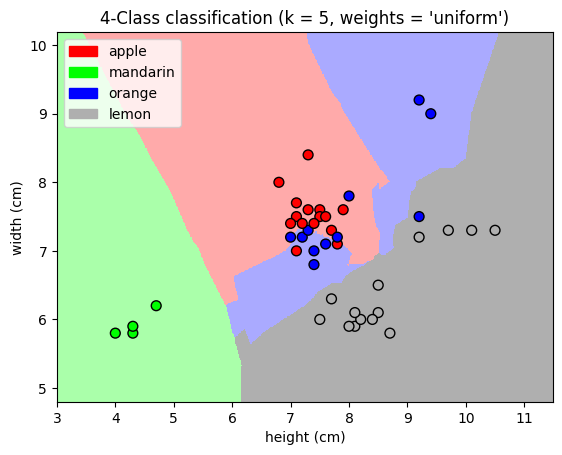

In [61]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# Assuming `data` is already defined and loaded
X = data[['mass', 'width', 'height', 'color_score']]
y = data['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary
    mesh_step_size = 0.01  # step size in the mesh
    plot_symbol_size = 50
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()

# Call the function
plot_fruit_knn(X_train, y_train, 5, 'uniform')
